# Principal Component Analysis

## import library

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [114]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

In [115]:
def plot_input_data(feature):
    x = feature[:, 0]
    y = feature[:, 1]
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    plt.plot(x, y, 'o', color = "blue")

    plt.tight_layout()
    plt.show()

In [116]:
def compute_mean(feature):
    mean = np.mean(feature, axis = 0)
    return mean

In [117]:
compute_mean(feature).shape
compute_std(feature).shape

(2,)

In [118]:
def compute_std(feature):
    std = np.std(feature, axis = 0)
    return std

## Normalization (Z-scoring)

In [119]:
# mean = 0, std = 1 이 되도록
def normalization(feature):
    mean = compute_mean(feature)
    std = compute_std(feature)
    z_feature = (feature - mean) / std
    return z_feature

In [120]:
# print(normalization(feature))
print(compute_mean(feature))
print(compute_std(feature))
# print(normalization(feature))
(x[0] - compute_mean(feature))[0] / compute_std(feature)[0]


[3.9892652 5.002806 ]
[1.16126059 1.01312228]


-0.5233151006515419

In [121]:
z_x = normalization(feature)[:, 0]
z_y = normalization(feature)[:, 1]

mean of x = 3.989265199999999
mean of y = 5.002806
std of x = 1.161260585149156
std of y = 1.0131222834742113


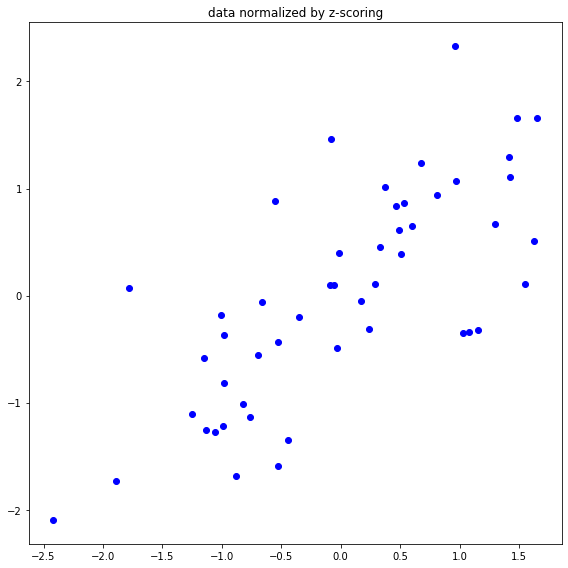

In [122]:
print("mean of x = {}".format(compute_mean(feature)[0]))
print("mean of y = {}".format(compute_mean(feature)[1]))
print("std of x = {}".format(compute_std(feature)[0]))
print("std of y = {}".format(compute_std(feature)[1]))

plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')

plt.plot(z_x, z_y, "o",color = "blue")

plt.tight_layout()
plt.show()

In [123]:
feature.shape

(50, 2)

## compute covariance matrix

In [124]:
def compute_covariance(feature):
    num_data = feature.shape[0]
    z_feature = normalization(feature)
    # 2 * n
    
    Sigma = np.dot(z_feature.T, z_feature) / num_data
    # 2 * 2
    return Sigma

In [125]:
test_cov = compute_covariance(feature)
a, v = np.linalg.eig(test_cov)
print(a)
print(v)
p = np.diag(a)
print(np.dot(v, p))
print(np.dot(np.dot(v, p), v.T))
print(test_cov)

[1.73553 0.26447]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 1.22720503 -0.18700853]
 [ 1.22720503  0.18700853]]
[[1.      0.73553]
 [0.73553 1.     ]]
[[1.      0.73553]
 [0.73553 1.     ]]


## compute principal directions

In [126]:
# covariance matrix를 통해서 eigen vector, value를 산출
def compute_eigen(X):
    eigenvalue, U = np.linalg.eig(X)
    S = np.diag(eigenvalue)
    return S, U

In [127]:
k = np.dot(U, S)
k[:, 0]
k[:, 1]
k

array([[ 1.22720503, -0.18700853],
       [ 1.22720503,  0.18700853]])

In [128]:
# eigen vector중 eigen value가 가장 큰 first PCA (red)와 second PCA (green)
def plot_principal_directions(feature):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    z_x = normalization(feature)[:, 0]
    z_y = normalization(feature)[:, 1]

    sigma = compute_covariance(feature)
    S, U = compute_eigen(sigma)
    eigen = np.dot(U, S)

    origin = np.array([[0, 0], [0, 0]])

    plt.plot(z_x, z_y, 'o', color = "blue")
    plt.quiver(*origin, eigen[0, :], eigen[1, :], color = ["r", "g"], scale = 5)
    # plt.plot(eigen, 'o', color = 'red')

    plt.tight_layout()
    plt.show()

## first principal axis

In [129]:
def compute_gradient(vector):
    grad = vector[1] / vector[0]
    return grad

In [130]:
ew = make_linear_function(eigen[:, 0])

NameError: name 'make_linear_function' is not defined

In [131]:
def plot_first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    
    z_x = normalization(feature)[:, 0]
    z_y = normalization(feature)[:, 1]

    sigma = compute_covariance(feature)
    S, U = compute_eigen(sigma)
    eigen = np.dot(U, S)
    
    A = np.arange(-3, 3, 0.01)
    grad = compute_gradient(eigen[:, 0])
    Y = A * grad

    plt.plot(z_x, z_y, 'o', color = "blue")
    plt.plot(A, Y, '-', color = "red")

    plt.tight_layout()
    plt.show()
    

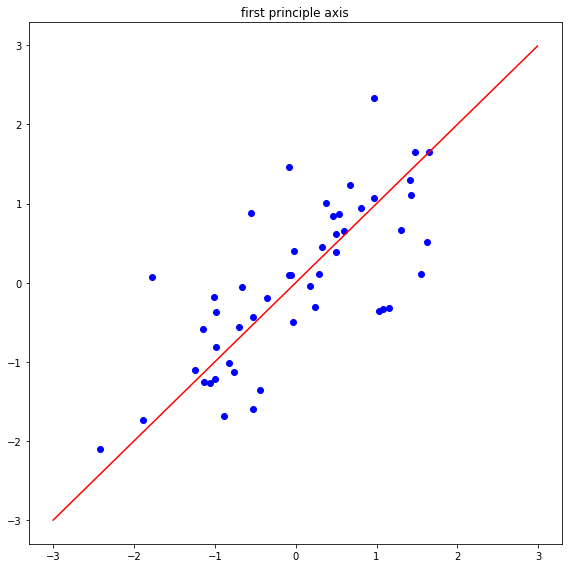

## second principal axis

In [132]:
def plot_second_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    
    z_x = normalization(feature)[:, 0]
    z_y = normalization(feature)[:, 1]

    sigma = compute_covariance(feature)
    S, U = compute_eigen(sigma)
    eigen = np.dot(U, S)

    A = np.arange(-3, 3, 0.01)
    grad = compute_gradient(eigen[:, 1])
    Y = A * grad

    plt.plot(z_x, z_y, 'o', color = "blue")
    plt.plot(A, Y, '-', color = "red")

    plt.tight_layout()
    plt.show()
    

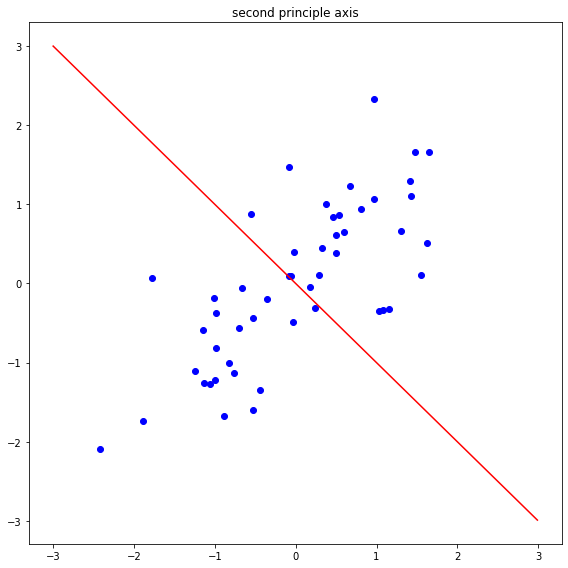

## compute the projection of point onto the line

In [133]:
np.array([1, 2, 1 /2, 1]).reshape(2, 2)

array([[1. , 2. ],
       [0.5, 1. ]])

In [134]:
def compute_projection_onto_line(feature, vector):
    grad = compute_gradient(vector)
    projection_matrix = ( np.array([1, grad, 1 / grad, 1]).reshape(2, 2) ) / 2

    z_feature = normalization(feature)
    
    projection = np.dot(z_feature, projection_matrix)    
    return projection

In [135]:
compute_projection_onto_line(feature, eigen[:, 0]).shape

(50, 2)

## projcet to the first principal axis

In [136]:
def plot_projection_first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    z_x = normalization(feature)[:, 0]
    z_y = normalization(feature)[:, 1]

    sigma = compute_covariance(feature)
    S, U = compute_eigen(sigma)
    eigen = np.dot(U, S)

    A = np.arange(-3, 3, 0.01)
    grad = compute_gradient(eigen[:, 0])
    Y = A * grad

    projection_x = compute_projection_onto_line(feature, eigen[:, 0])[:, 0]
    projection_y = compute_projection_onto_line(feature, eigen[:, 0])[:, 1]

    plt.plot(z_x, z_y, 'o', color = 'b')
    plt.plot(A, Y, '-', color = 'r')
    plt.plot(projection_x, projection_y, 'o', color = 'g')


    plt.tight_layout()
    plt.show()

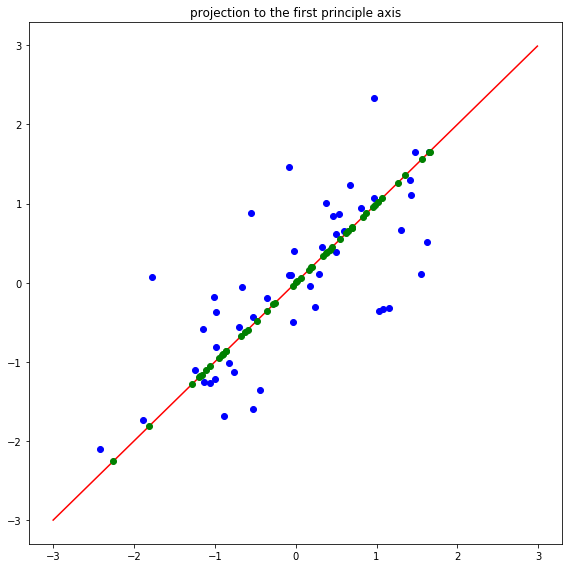

## projcet to the second principal axis

In [137]:
def plot_projection_second_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    z_x = normalization(feature)[:, 0]
    z_y = normalization(feature)[:, 1]

    sigma = compute_covariance(feature)
    S, U = compute_eigen(sigma)
    eigen = np.dot(U, S)

    A = np.arange(-3, 3, 0.01)
    grad = compute_gradient(eigen[:, 1])
    Y = A * grad

    projection_x = compute_projection_onto_line(feature, eigen[:, 1])[:, 0]
    projection_y = compute_projection_onto_line(feature, eigen[:, 1])[:, 1]

    plt.plot(z_x, z_y, 'o', color = 'b')
    plt.plot(A, Y, '-', color = 'r')
    plt.plot(projection_x, projection_y, 'o', color = 'g')

    plt.tight_layout()
    plt.show()

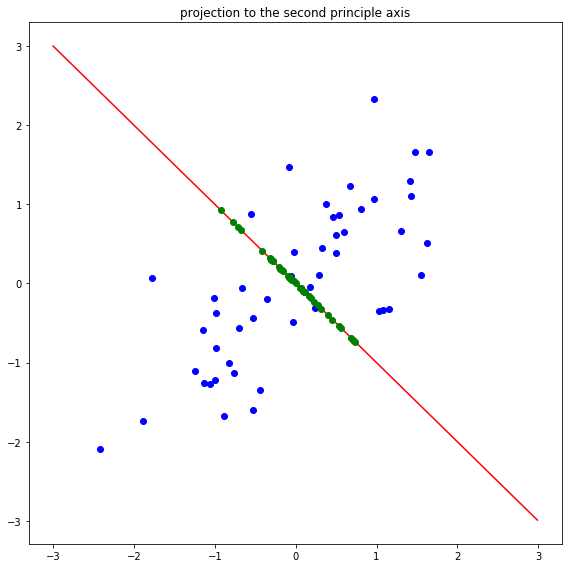

## connect original data to the projection onto the first principal axis

In [138]:
def connect_original_first_principal(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    z_x = normalization(feature)[:, 0]
    z_y = normalization(feature)[:, 1]

    sigma = compute_covariance(feature)
    S, U = compute_eigen(sigma)
    eigen = np.dot(U, S)

    A = np.arange(-3, 3, 0.01)
    grad = compute_gradient(eigen[:, 0])
    Y = A * grad

    projection_x = compute_projection_onto_line(feature, eigen[:, 0])[:, 0]
    projection_y = compute_projection_onto_line(feature, eigen[:, 0])[:, 1]

    plt.plot(z_x, z_y, 'o', color = 'b')
    plt.plot(A, Y, '-', color = 'r')
    plt.plot(projection_x, projection_y, 'o', color = 'g')
    plt.plot([z_x, projection_x], [z_y, projection_y], '-', color = "gray")

    plt.tight_layout()
    plt.show()
    

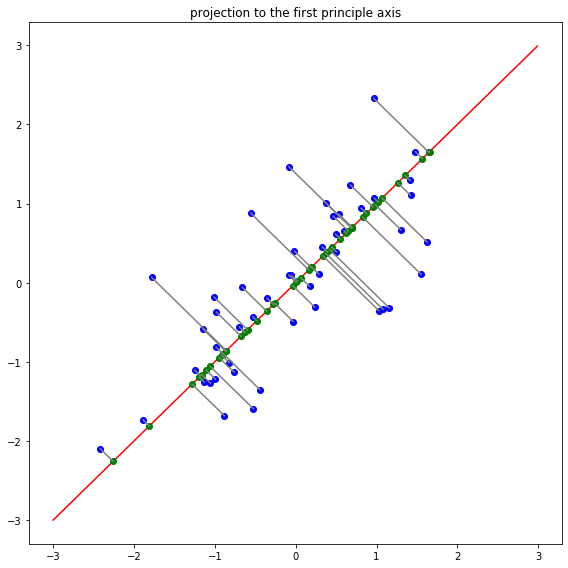

## connect original data to the projection onto the second principal axis

In [139]:
def connect_original_second_principal(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    z_x = normalization(feature)[:, 0]
    z_y = normalization(feature)[:, 1]

    sigma = compute_covariance(feature)
    S, U = compute_eigen(sigma)
    eigen = np.dot(U, S)

    A = np.arange(-3, 3, 0.01)
    grad = compute_gradient(eigen[:, 1])
    Y = A * grad

    projection_x = compute_projection_onto_line(feature, eigen[:, 1])[:, 0]
    projection_y = compute_projection_onto_line(feature, eigen[:, 1])[:, 1]

    plt.plot(z_x, z_y, 'o', color = 'b')
    plt.plot(A, Y, '-', color = 'r')
    plt.plot(projection_x, projection_y, 'o', color = 'g')
    plt.plot([z_x, projection_x], [z_y, projection_y], '-', color = "gray")
    plt.tight_layout()
    plt.show()
    

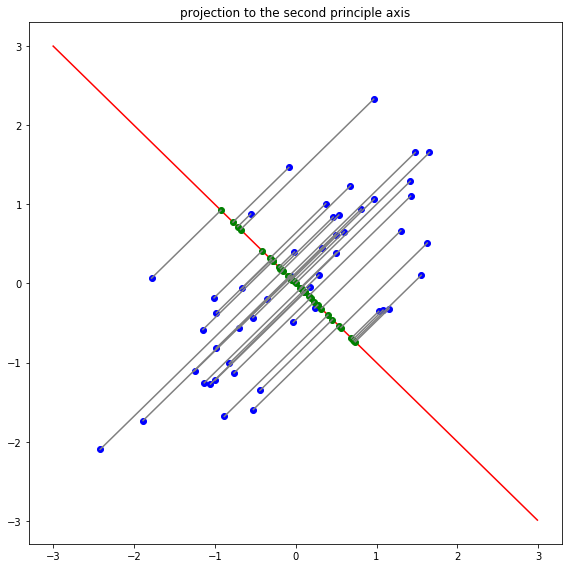

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

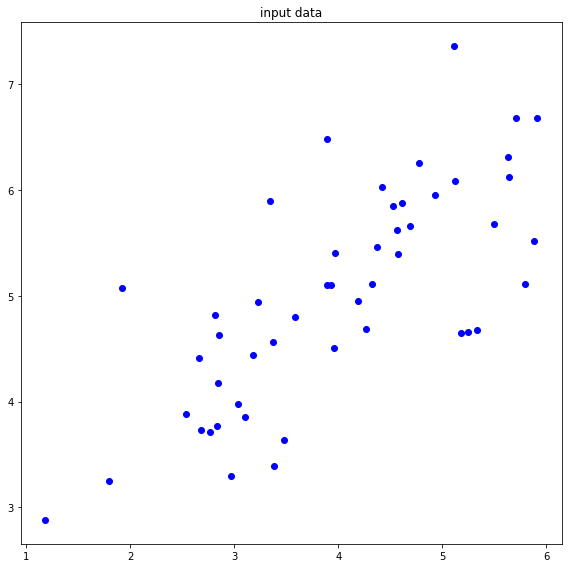

In [140]:
plot_input_data(feature)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

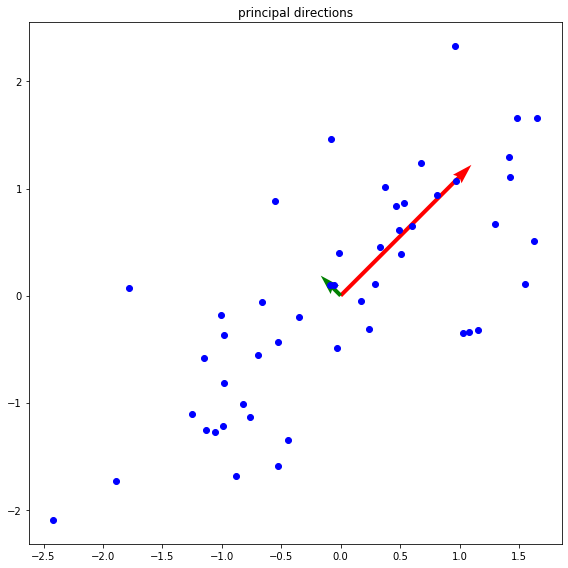

In [141]:
plot_principal_directions(feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

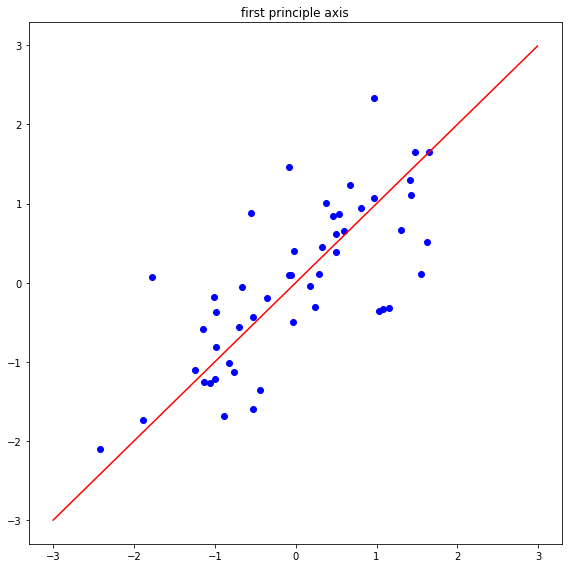

In [142]:
plot_first_principal_axis(feature)

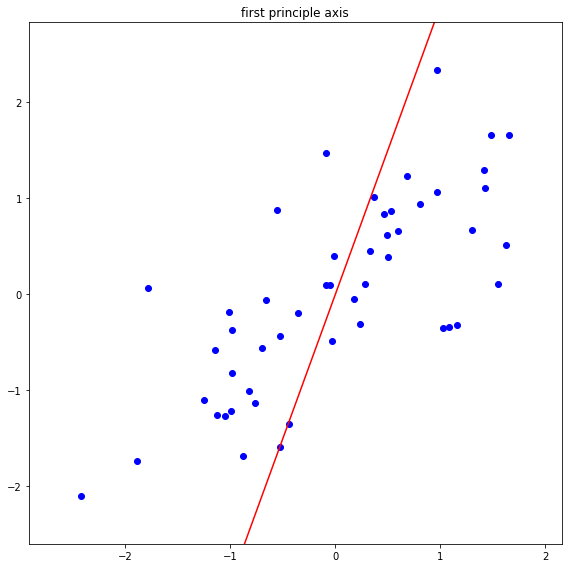

***

### 4. plot the second principal axis in red on the normalized data in blue

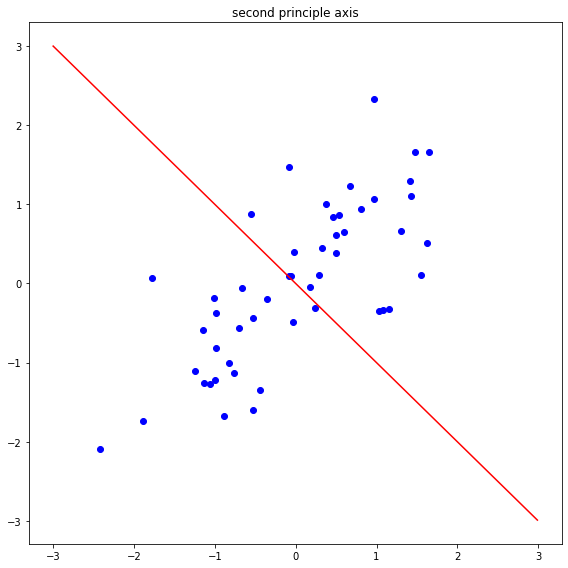

In [97]:
plot_second_principal_axis(feature)

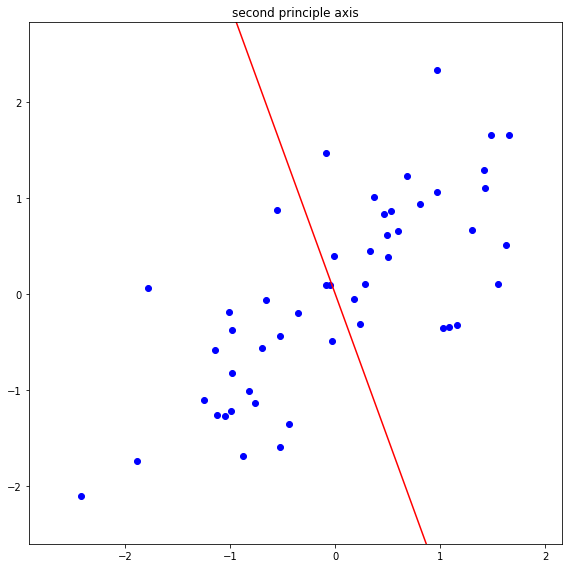

***

### 5. plot the projection of data in green onto the first principal axis in red

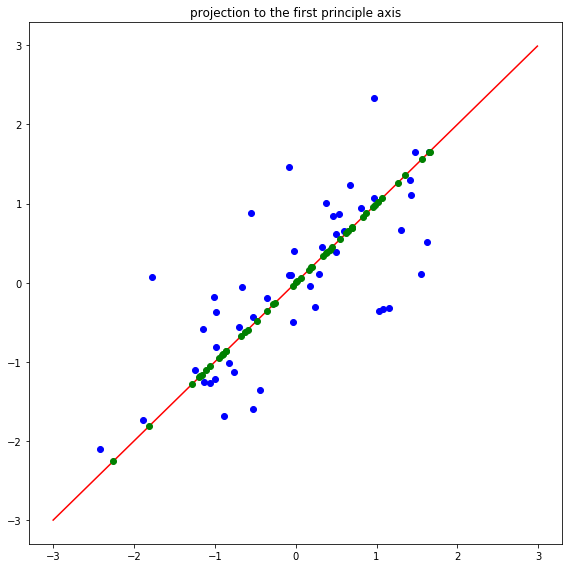

In [101]:
plot_projection_first_principal_axis(feature)

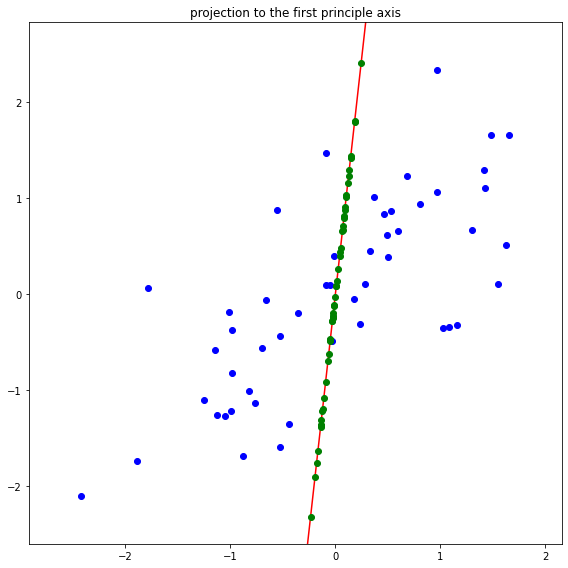

***

### 6. plot the projection of data in green onto the second principal axis in red

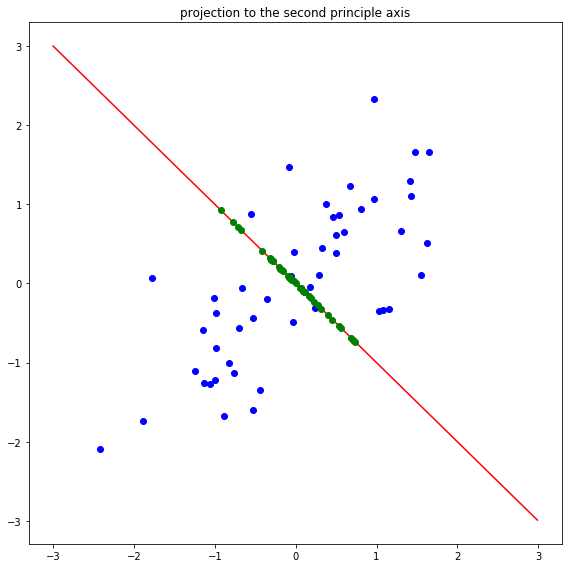

In [103]:
plot_projection_second_principal_axis(feature)

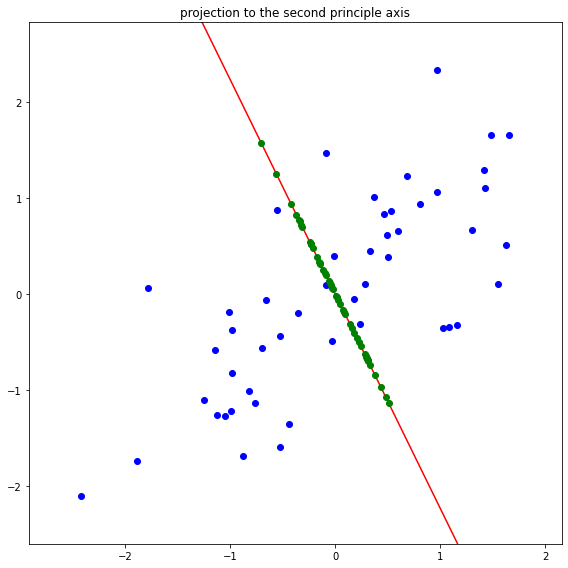

***

### 7. plot the projection line in grey onto the first principal axis

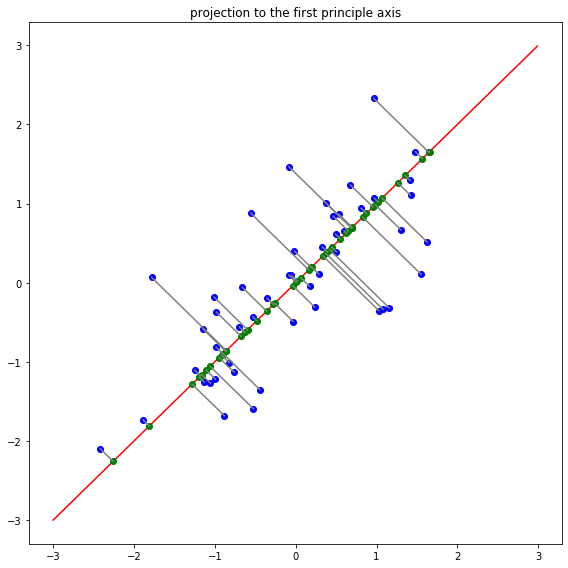

In [106]:
connect_original_first_principal(feature)

***

### 8. plot the projection line in grey onto the second principal axis

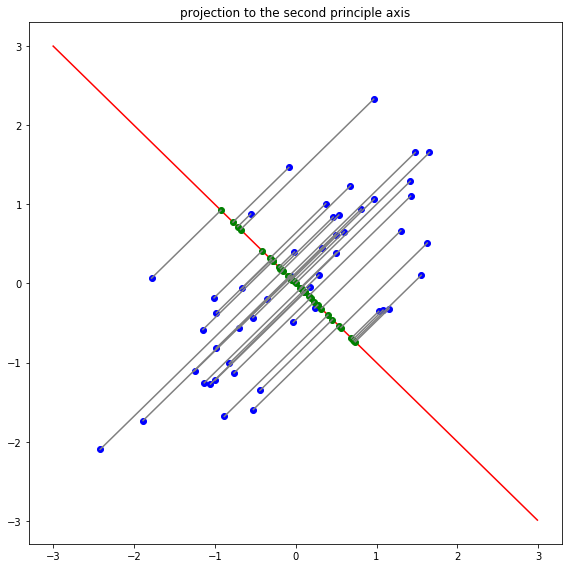

In [112]:
connect_original_second_principal(feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***